# Q1

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

In [2]:
MD = pd.read_excel('MeasurementData_Q1.xlsx')

**a**

In [3]:
def ma(N, lst1, lst2):
    return_list1=[]
    return_list2=[]
    for i in range(0, len(lst2)):
        return_list1.append(lst1[i])
        sum_n = 0
        if i<(N-1):
            return_list2.append(None)
        else:
            for n in range(i, i-N, -1):
                sum_n += lst2[n]
            avg = sum_n/N
            return_list2.append(avg)
    return return_list1, return_list2

In [4]:
Measurment = list(MD['Measurement'])
time = list(MD['Year'])
time_new, Measurment_new = ma(11, time, Measurment)

In [5]:
MD['Moving_Avg_11'] = Measurment_new

Text(0, 0.5, 'Measurement')

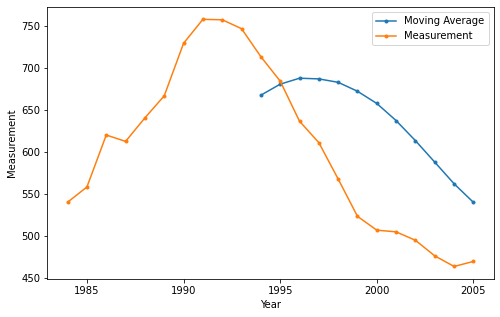

In [6]:
plt.figure(figsize=(8,5))
plt.plot(MD['Year'],MD['Moving_Avg_11'], '.-', label='Moving Average')
plt.plot(MD['Year'],MD['Measurement'], '.-', label='Measurement')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Measurement')

**b**

Text(0, 0.5, 'Measurement')

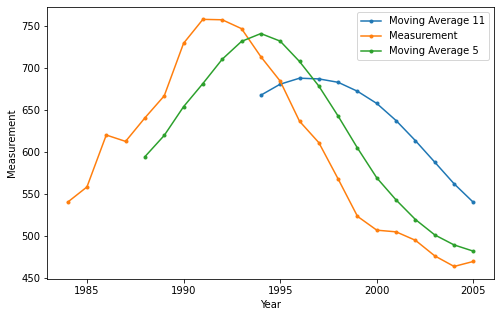

In [7]:
time_new, Measurment_new = ma(5, time, Measurment)
MD['Moving_Avg_5'] = Measurment_new
plt.figure(figsize=(8,5))
plt.plot(MD['Year'],MD['Moving_Avg_11'], '.-', label='Moving Average 11')
plt.plot(MD['Year'],MD['Measurement'], '.-', label='Measurement')
plt.plot(MD['Year'],MD['Moving_Avg_5'], '.-', label='Moving Average 5')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Measurement')

**c**

Reducing N causes the moving average line to become more concaved and more variated. That is because the data is extremely concaved throughout. Taking less data to calculate each average leads to a more fluctuating moving average, while taking more data to calculate average leads to a more steady trend because of the slower pace where the moving average keeps up with original data.

# Q3

In [8]:
from statsmodels.tsa.api import SimpleExpSmoothing

Text(0, 0.5, 'Yield, %')

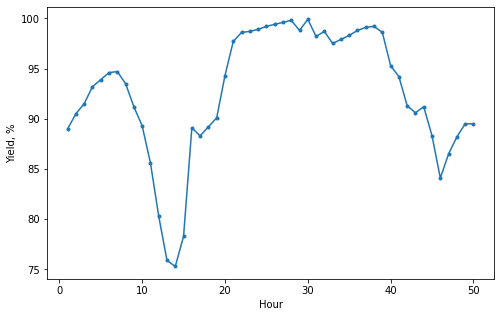

In [9]:
Y = pd.read_excel("Yield_Data.xlsx")
plt.figure(figsize=(8,5))
plt.plot(Y['Hour'],Y['Yield, %'], '.-')
plt.xlabel('Hour')
plt.ylabel('Yield, %')

**a**

In [10]:
def fos(lbd, lst):
    return_list = [lst[0]]
    for i in range(1, len(lst)):
        yt = lbd*lst[i]+(1-lbd)*return_list[-1]
        return_list.append(yt)
    return return_list

In [11]:
Yeild_smoothed_02 = fos(0.2, Y['Yield, %'])
Y['Smoothed 0.2'] = Yeild_smoothed_02

Text(0, 0.5, 'Yield, %')

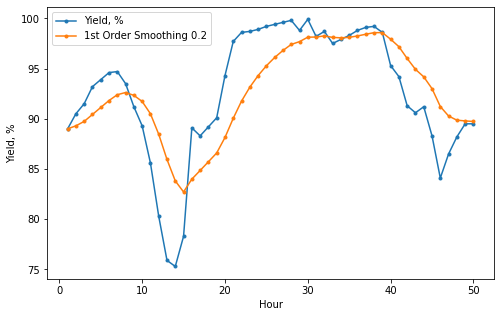

In [12]:
plt.figure(figsize=(8,5))
plt.plot(Y['Hour'],Y['Yield, %'], '.-', label='Yield, %')
plt.plot(Y['Hour'],Y['Smoothed 0.2'], '.-', label='1st Order Smoothing 0.2')
plt.legend()
plt.xlabel('Hour')
plt.ylabel('Yield, %')

**b**

Text(0, 0.5, 'Yield, %')

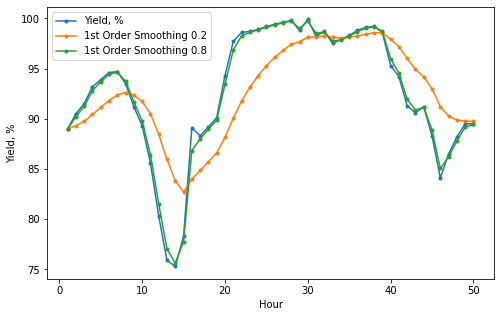

In [13]:
Yeild_smoothed_08 = fos(0.8, Y['Yield, %'])
Y['Smoothed 0.8'] = Yeild_smoothed_08
plt.figure(figsize=(8,5))
plt.plot(Y['Hour'],Y['Yield, %'], '.-', label='Yield, %')
plt.plot(Y['Hour'],Y['Smoothed 0.2'], '.-', label='1st Order Smoothing 0.2')
plt.plot(Y['Hour'],Y['Smoothed 0.8'], '.-', label='1st Order Smoothing 0.8')
plt.legend()
plt.xlabel('Hour')
plt.ylabel('Yield, %')

**c**

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
error_02 = mean_squared_error(Y['Yield, %'], Y['Smoothed 0.2'])
error_08 = mean_squared_error(Y['Yield, %'], Y['Smoothed 0.8'])
print("Error when lambda=0.2: {0}".format(error_02))
print("Error when lambda=0.8: {0}".format(error_08))

Error when lambda=0.2: 15.671048945737011
Error when lambda=0.8: 0.2950579416051249


Lambda=0.8 produces a lower error than lambda=0.2.